In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylb
import scipy.stats
from scipy.stats import norm
import glob
import pandas as pd
import matplotlib.ticker as mticker
%matplotlib inline
plt.style.use('/Users/arceliahermosillo/Research/stochastic/paper_labels_colors.mplstyle')

import scipy.interpolate as scpint

In [2]:
colors = {"Bdazzled Blue":"#335471","Cadet Blue":"#69a2b0","Dark purple":"#5e4085",\
"Fern Green":"#58804d","Olivine":"#a1c084","Amaranth":"#dd4053","Light Pink":"#ffa5a5",\
"light purple":"#a885c9","Brown Sugar":"#a9714b","Dark Sienna":"#49111c"}

In [3]:
colorarr = ['#335471','#69a2b0','#5e4085','#58804d','#a1c084','#dd4053','#ffa5a5','#a885c9','#a9714b','#49111c']

In [4]:
a_2, e_2 = np.genfromtxt('/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/newdata_dec2012/newae/highe_1000000y.dat', skip_header = 1).T
a_1, e_1 = np.genfromtxt('/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/newdata_dec2012/newae/lowe_1000000y.dat', skip_header = 1).T


0.17334031858765872
0.006933612743506349


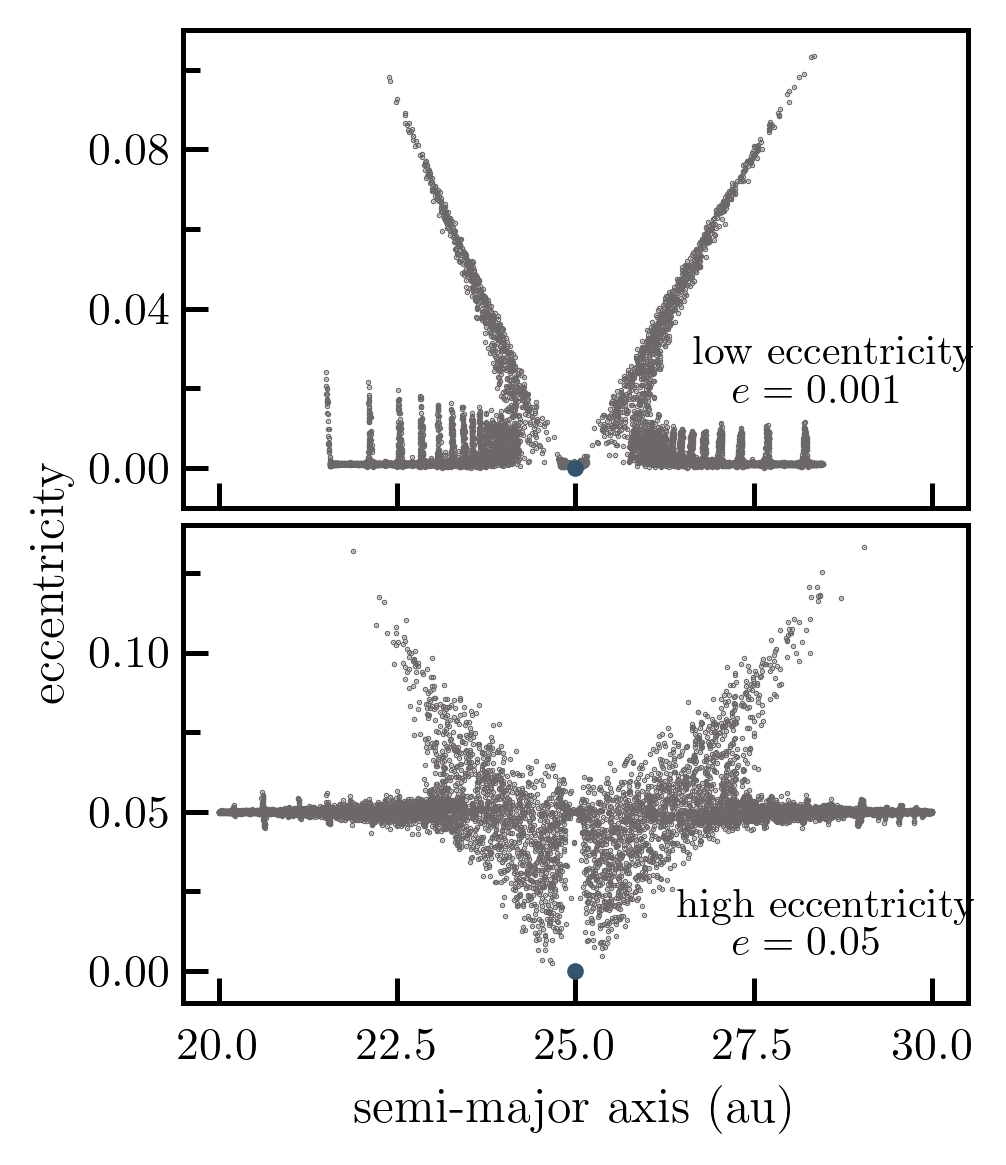

In [5]:
def Rhill(ap, Mp, Mstar):
    return ap*(Mp/(3*Mstar))**(1/3)

mSun = 1.98e33 #grams
# mEarth = 3e-6*mSun #grams
# mNep = (5.15e-5)*mSun #grams
# mPlut = (6.58e-9)*mSun #grams
G = 6.67e-8 # cgs
AU = 1.496e13 #cm
yr_to_sec = 3.1536e7
a_planet = 25*AU
m_planet = 1e-6*mSun
rh = Rhill(a_planet, m_planet, mSun)
eh = rh/a_planet
print(rh/AU)
print(eh)


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (3.3,3.8))
ax2.plot(a_2, e_2, '.', markersize = 0.6, linestyle = 'none', color = '#6c6869',rasterized = True)
ax1.plot(a_1, e_1, '.', markersize = 0.6, linestyle = 'none', color = '#6c6869', rasterized = True)
ax2.plot(25, 0, 'o', markersize = 3, color = colors["Bdazzled Blue"])
ax1.plot(25, 0, 'o', markersize = 3, color = colors["Bdazzled Blue"])
ax1.set_ylim(-0.01,0.11)
ax2.set_ylim(-0.01,0.14)
ax1.set_xlim(19.5,30.5)
ax2.set_xlabel("semi-major axis (au)")
ax1.tick_params(axis='y', which = 'both', right = False)
ax1.tick_params(axis='x', which = 'both', top = False)
ax2.tick_params(axis='y', which = 'both', right = False)
ax2.tick_params(axis='x', which = 'both', top = False)
ax1.yaxis.set_major_locator(mticker.MaxNLocator(3))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
f.supylabel("eccentricity")
ax2.annotate("high eccentricity", (0.63,0.18), xycoords = "axes fraction", fontsize = 10)
ax2.annotate("$e = 0.05$", (0.7,0.1), xycoords = "axes fraction", fontsize = 10)
ax1.annotate("low eccentricity", (0.65, 0.3), xycoords = "axes fraction", fontsize = 10)
ax1.annotate("$e = 0.001$", (0.7, 0.22), xycoords = "axes fraction", fontsize = 10)
plt.tight_layout(pad=0.35, w_pad=0.5)
# plt.savefig('finalplots/simulation_snapshot_1e6.pdf')

In [6]:
rh/AU

0.17334031858765872

In [7]:
a_1 = np.delete(a_1,np.where(a_1<1))
e_1 = np.delete(e_1, np.where(e_1==0))

a_2 = np.delete(a_2, np.where(a_2<1))
e_2 = np.delete(e_2, np.where(e_2==0))

plt.rcParams["lines.linewidth"] = 1
Rs = np.linspace(0.001,30,500)

bound1_x = (a_planet - Rs*rh)/AU
bound1_y = Rs*(eh)
bound2_x = (a_planet+Rs*rh)/AU
bound2_y = Rs*eh

bound3_x = (a_planet-Rs*rh)/AU
bound3_y = eh/Rs**2
bound4_x = (a_planet+Rs*rh)/AU
bound4_y = eh/Rs**2

R11 = 5.0
R12 = 3.0
R13 = 1.0
R21 = 1.0 # equation c doesn't use R
R22 = 1.0 # equation c doesn't use R
R23 = 10.0

x11 = (a_planet - R11*rh)/AU
x12 = (a_planet - R12*rh)/AU
x13 = (a_planet - R13*rh)/AU
x21 = (a_planet - R21*rh)/AU
x22 = (a_planet - R22*rh)/AU
x23 = (a_planet - R23*rh)/AU


x11_plus = (a_planet + R11*rh)/AU
x12_plus = (a_planet + R12*rh)/AU
x13_plus = (a_planet + R13*rh)/AU
x21_plus = (a_planet + R21*rh)/AU
x22_plus = (a_planet + R22*rh)/AU
x23_plus = (a_planet + R23*rh)/AU


e11 = 0.001
e12 = eh
e13 = 0.001
e21 = 0.05
e22 = 0.01
e23 = 0.05

## interpolating so that i can get values between lines

In [8]:
f_xlinear = scpint.interp1d(bound1_x, bound1_y)
f_xlinear_right = scpint.interp1d(bound2_x,bound2_y)

In [9]:
f_x2 = scpint.interp1d(bound3_x, bound3_y)
f_x2_right = scpint.interp1d(bound4_x,bound4_y)

In [10]:
a1_interp = a_1[a_1<25.]
a1_interp_right = a_1[a_1>25.]
ylinear = f_xlinear(a1_interp)
ylinear_right = f_xlinear_right(a1_interp_right)
yx2 = f_x2(a1_interp)
yx2_right = f_x2_right(a1_interp_right)

e1_interp = e_1[a_1<25.]
e1_interp_right = e_1[a_1>25.]

lessthanblue = (e1_interp-yx2 < 0)
lessthanamar = (e1_interp-ylinear <0)
e1_lessthanblue= e1_interp[lessthanblue]
a1_lessthanblue = a1_interp[lessthanblue]

e1_lessthanamar = e1_interp[lessthanamar]
a1_lessthanamar = a1_interp[lessthanamar]

In [11]:
a2_interp = a_2[a_2<25]
a2_interp_right = a_2[a_2>25]
ylinear = f_xlinear(a2_interp)
yx2 = f_x2(a2_interp)

ylinear_right = f_xlinear_right(a2_interp_right)
yx2_right = f_x2_right(a2_interp_right)

e2_interp = e_2[a_2<25]
e2_interp_right=  e_2[a_2>25]

lessthanblue = (e2_interp-yx2 < 0)
lessthanamar = (e2_interp-ylinear <0)
e2_lessthanblue= e2_interp[lessthanblue]
a2_lessthanblue = a2_interp[lessthanblue]

e2_lessthanamar = e2_interp[lessthanamar]
a2_lessthanamar = a2_interp[lessthanamar]

between2 = (e2_interp-yx2 > 0) & (e2_interp-ylinear > 0)
a2_between = a2_interp[between2]
e2_between = e2_interp[between2]


In [12]:
ylinear = f_xlinear(a1_interp)
yx2 = f_x2(a1_interp)

ylinear_right = f_xlinear_right(a1_interp_right)
yx2_right = f_x2_right(a1_interp_right)

group1particles_a = a1_interp[((a1_interp >= x11 - 1.0*rh/AU) & (a1_interp <= x11 + 1.0*rh/AU) & \
                        (e1_interp-ylinear <=0))]

group1particles_a_right = a1_interp_right[((a1_interp_right >= x11_plus - 1.0*rh/AU) & (a1_interp_right <= x11_plus + 1.0*rh/AU) \
                 &  (e1_interp_right-ylinear_right <=0))]

group1particles_e = e1_interp[((a1_interp >= x11 - 1.0*rh/AU) & (a1_interp <= x11+ 1.0*rh/AU) & \
                        (e1_interp-ylinear <=0))]

group1particles_e_right = e1_interp_right[((a1_interp_right >= x11_plus - 1.0*rh/AU) & (a1_interp_right <= x11_plus + 1.0*rh/AU) &\
                              (e1_interp_right-ylinear_right <=0))]  

group2particles_a = a1_interp[((a1_interp >= x12 - 1.0*rh/AU) & (a1_interp <= x12 + 1.0*rh/AU)& \
                        (e1_interp-ylinear <=0))]

group2particles_a_right = a1_interp_right[((a1_interp_right >= x12_plus - 1.0*rh/AU) & (a1_interp_right <= x12_plus + 1.0*rh/AU) \
                               &(e1_interp_right-ylinear_right <=0))]

group2particles_e = e1_interp[((a1_interp >= x12 - 1.0*rh/AU) & (a1_interp <= x12 + 1.0*rh/AU)& \
                        (e1_interp-ylinear <=0))]
                              
group2particles_e_right = e1_interp_right[((a1_interp_right >= x12_plus - 1.0*rh/AU) & (a1_interp_right <= x12_plus + 1.0*rh/AU) \
                               &(e1_interp_right-ylinear_right <=0))]

group3particles_a = a1_interp[((a1_interp >= x13 - 1.0*rh/AU) & (a1_interp <= x13 + 1.0*rh/AU) & \
                        (e1_interp-yx2 <= 0))]

group3particles_a_right = a1_interp_right[((a1_interp_right >= x13_plus - 1.0*rh/AU) & (a1_interp_right <= x13_plus + 1.0*rh/AU) \
                               &(e1_interp_right-yx2_right <= 0))]

group3particles_e = e1_interp[((a1_interp >= x13 - 1.0*rh/AU) & (a1_interp <= x13 + 1.0*rh/AU) & \
                        (e1_interp-yx2 <= 0))]
group3particles_e_right = e1_interp_right[((a1_interp_right >= x13_plus - 1.0*rh/AU) & (a1_interp_right <= x13_plus + 1.0*rh/AU) \
                               &(e1_interp_right-yx2_right <= 0))]

ylinear = f_xlinear(a2_interp)
yx2 = f_x2(a2_interp)

ylinear_right = f_xlinear_right(a2_interp_right)
yx2_right = f_x2_right(a2_interp_right)

group4particles_a = a2_interp[((e2_interp-yx2 > 0.0) & (e2_interp-ylinear > 0.0) & (e2_interp> 0.03)& (e2_interp<0.08))]
group4particles_a_right = a2_interp_right[((e2_interp_right-yx2_right >= 0) & (e2_interp_right-ylinear_right >= 0)&\
                                           (e2_interp_right> 0.03)& (e2_interp_right<0.08))]

group4particles_e = e2_interp[((e2_interp-yx2 > 0.0) & (e2_interp-ylinear > 0.0)& (e2_interp> 0.03)& (e2_interp<0.08))]
group4particles_e_right = e2_interp_right[((e2_interp_right-yx2_right >= 0) & (e2_interp_right-ylinear_right >= 0)&\
                                           (e2_interp_right> 0.03)& (e2_interp_right<0.08))]


group5particles_a = a2_interp[((e2_interp-yx2 >= 0) & (e2_interp-ylinear >= 0)& (e2_interp<= 0.03))]
group5particles_a_right=a2_interp_right[((e2_interp_right-yx2_right >= 0) & (e2_interp_right-ylinear_right >= 0)& \
                          (e2_interp_right<= 0.03))]

group5particles_e = e2_interp[((e2_interp-yx2 >= 0) & (e2_interp-ylinear >= 0)&(e2_interp<= 0.03))]
group5particles_e_right = e2_interp_right[((e2_interp_right-yx2_right >= 0) & (e2_interp_right-ylinear_right >= 0)&\
                                           (e2_interp_right<= 0.03))]

group6particles_a = a2_interp[((a2_interp >= x23 - 1.0*rh/AU) & (a2_interp <= x23 + 1.0*rh/AU) & \
                        (e2_interp-ylinear <=0.0))]
group6particles_a_right=a2_interp_right[((a2_interp_right >= x23_plus - 1.0*rh/AU) & (a2_interp_right <= x23_plus + 1.0*rh/AU)&\
                              (e2_interp_right-ylinear_right <=0.0)) ]

group6particles_e = e2_interp[((a2_interp >= x23 - 1.0*rh/AU) & (a2_interp <= x23 + 1.0*rh/AU) & \
                        (e2_interp-ylinear <=0.0))]
group6particles_e_right=e2_interp_right[((a2_interp_right >= x23_plus - 1.0*rh/AU) & (a2_interp_right <= x23_plus + 1.0*rh/AU)&\
                              (e2_interp_right-ylinear_right <=0.)) ]

In [13]:
len(group1particles_a),len(group2particles_a),len(group3particles_a),len(group4particles_a),len(group5particles_a), len(group6particles_a)

(478, 61, 269, 806, 95, 314)

In [14]:
len(group1particles_a_right),len(group2particles_a_right),len(group3particles_a_right),len(group4particles_a_right),len(group5particles_a_right),len(group6particles_a_right)

(524, 114, 190, 749, 108, 262)

Text(0.7, 0.22, '$e = 0.001$')

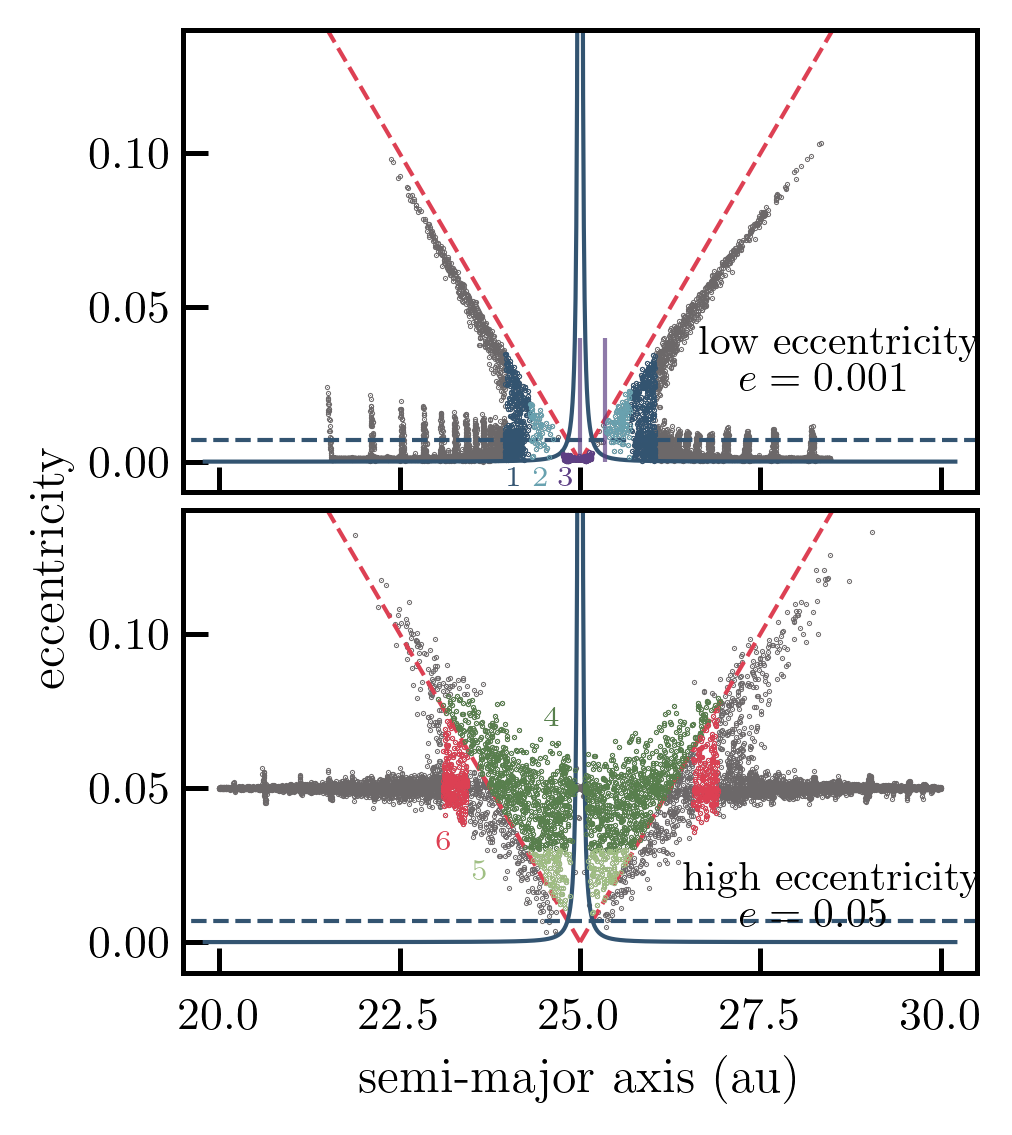

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize = (3.3,3.7))
ax2.plot(a_2, e_2, '.', markersize = 0.5, linestyle = 'none', color = '#6c6869',rasterized = True)
ax1.plot(a_1, e_1, '.', markersize = 0.5, linestyle = 'none', color = '#6c6869', rasterized = True)
ax1.set_ylim(-0.01,0.14)
ax2.set_ylim(-0.01,0.14)
ax1.set_xlim(19.5,30.5)
ax2.set_xlabel("semi-major axis (au)")

ax2.plot(bound1_x, bound1_y, color =  colors["Amaranth"], linestyle = '--')
ax2.plot(bound2_x, bound2_y, color =  colors["Amaranth"], linestyle = '--')
ax2.plot(bound3_x, bound3_y, color =  colors["Bdazzled Blue"])
ax2.plot(bound4_x, bound4_y, color =  colors["Bdazzled Blue"])
ax2.hlines(eh, 19, 31, linestyle = '--', color =  colors["Bdazzled Blue"])
ax1.plot(bound1_x, bound1_y, color =  colors["Amaranth"], linestyle = '--')
ax1.plot(bound2_x, bound2_y, color =  colors["Amaranth"], linestyle = '--')
ax1.plot(bound3_x, bound3_y, color =  colors["Bdazzled Blue"])
ax1.plot(bound4_x, bound4_y, color =  colors["Bdazzled Blue"])
ax1.hlines(eh, 19, 31, linestyle = '--', color =  colors["Bdazzled Blue"])

ax1.vlines(x13_plus - rh/AU,0,0.04, color = colorarr[2], alpha = 0.7)
ax1.vlines(x13_plus + rh/AU,0,0.04, color =colorarr[2], alpha = 0.7)

ax1.plot(group1particles_a, group1particles_e, '.', markersize = 0.5, color = colorarr[0])
ax1.plot(group2particles_a, group2particles_e, '.', markersize = 0.5, color = colorarr[1])
ax1.plot(group3particles_a, group3particles_e, '.', markersize = 0.5, color = colorarr[2])
ax2.plot(group4particles_a, group4particles_e, '.', markersize = 0.5, color = colorarr[3])
ax2.plot(group5particles_a, group5particles_e, '.', markersize = 0.5, color = colorarr[4])
ax2.plot(group6particles_a, group6particles_e, '.', markersize = 0.5, color = colorarr[5])

ax1.plot(group1particles_a_right, group1particles_e_right, '.', markersize = 0.5, color = colorarr[0])
ax1.plot(group2particles_a_right, group2particles_e_right, '.', markersize = 0.5, color = colorarr[1])
ax1.plot(group3particles_a_right, group3particles_e_right, '.', markersize = 0.5, color = colorarr[2])
ax2.plot(group4particles_a_right, group4particles_e_right, '.', markersize = 0.5, color = colorarr[3])
ax2.plot(group5particles_a_right, group5particles_e_right, '.', markersize = 0.5, color = colorarr[4])
ax2.plot(group6particles_a_right, group6particles_e_right, '.', markersize = 0.5, color = colorarr[5])

ax1.annotate("1",(24,-0.008),color=colorarr[0],fontsize=7)
ax1.annotate("2",(24.35,-0.008),color=colorarr[1],fontsize=7)
ax1.annotate("3",(24.7,-0.008),color=colorarr[2],fontsize=7)
ax2.annotate("4",(24.5,0.07),color=colorarr[3],fontsize=7)
ax2.annotate("5",(23.5,0.02),color=colorarr[4],fontsize=7)
ax2.annotate("6",(23,0.03),color=colorarr[5],fontsize=7)
f.supylabel("eccentricity")
ax1.tick_params(axis='y', which = 'both', right = False)
ax1.tick_params(axis='x', which = 'both', top = False)
ax2.tick_params(axis='y', which = 'both', right = False)
ax2.tick_params(axis='x', which = 'both', top = False)
plt.tight_layout(pad=0.35, w_pad=0.5)
ax2.annotate("high eccentricity", (0.63,0.18), xycoords = "axes fraction", fontsize = 10)
ax2.annotate("$e = 0.05$", (0.7,0.1), xycoords = "axes fraction", fontsize = 10)
ax1.annotate("low eccentricity", (0.65, 0.3), xycoords = "axes fraction", fontsize = 10)
ax1.annotate("$e = 0.001$", (0.7, 0.22), xycoords = "axes fraction", fontsize = 10)

In [16]:
curlyR1_arr = abs(group1particles_a - 25)/(rh/AU)
curlyR2_arr = abs(group2particles_a - 25)/(rh/AU)
curlyR3_arr = abs(group3particles_a - 25)/(rh/AU)
curlyR4_arr = abs(group4particles_a - 25)/(rh/AU)
curlyR5_arr = abs(group5particles_a - 25)/(rh/AU)
curlyR6_arr = abs(group6particles_a - 25)/(rh/AU)
curlyR11 = np.mean(curlyR1_arr)
curlyR12 = np.mean(curlyR2_arr)
curlyR13 = np.mean(curlyR3_arr)
curlyR21 = np.mean(curlyR4_arr)
curlyR22 = np.mean(curlyR5_arr)
curlyR23 = np.mean(curlyR6_arr)

In [17]:
R11, R12, R13

(5.0, 3.0, 1.0)

In [18]:
curlyR11, curlyR12, curlyR13

(5.254267989859687, 3.381649732338216, 0.6369456504397889)

In [19]:
R21, R22, R23

(1.0, 1.0, 10.0)

In [20]:
curlyR21, curlyR22, curlyR23

(4.3555193527710365, 2.1439629245163334, 10.060685193950306)

In [21]:
mplanetesimal = 1.8e-10*mSun

In [22]:
ad = 26.6

In [23]:
N1 = len(group1particles_a)
N2 = len(group2particles_a)
N3 = len(group3particles_a)
N4 = len(group4particles_a)
N5 = len(group5particles_a)
N6 = len(group6particles_a)

N1R = len(group1particles_a_right)
N2R = len(group2particles_a_right)
N3R = len(group3particles_a_right)
N4R = len(group4particles_a_right)
N5R = len(group5particles_a_right)
N6R = len(group6particles_a_right)

mplanetesimal = 1.8e-10*mSun
Mtot1 = mplanetesimal*N1
Mtot1R = mplanetesimal*N1R
Sig1 = Mtot1/(2.0*rh*2*np.pi*x11*AU)
Sig1R = Mtot1R/(2.0*rh*2*np.pi*x11_plus*AU)
print('group 1')
print('number of planetesimals', N1+N1R)
print("sigma g/cm^2", Sig1, Sig1R)
print(x11,x11_plus)
curlyM1 = (Sig1*2*np.pi*(ad*AU)**2)/m_planet
curlyM1R = (Sig1R*2*np.pi*(ad*AU)**2)/m_planet
print("curlyM, toto",curlyM1,curlyM1R, curlyM1+curlyM1R)

Mtot2 = mplanetesimal*N2
Mtot2R =mplanetesimal*N2R
Sig2 = (Mtot2)/(2.0*rh*2*np.pi*x12*AU)
Sig2R = Mtot2R/(2.0*rh*2*np.pi*x12_plus*AU)
print("group 2")
print("number", N2+N2R)
print("sigma g/cm^2", Sig2,Sig2R)
print(x12,x12_plus)
curlyM2 = (Sig2*2*np.pi*(ad*AU)**2)/m_planet
curlyM2R = (Sig2R*2*np.pi*(ad*AU)**2)/m_planet
print("curlyM", curlyM2,curlyM2R,curlyM2+curlyM2R)


Mtot3 = mplanetesimal*N3
Sig3 = Mtot3/(2*rh*2*np.pi*x13*AU)
Mtot3R = mplanetesimal*N3R
Sig3R = Mtot3R/(2*rh*2*np.pi*x13_plus*AU)
print("group 3")
print("number", N3,N3R)
print("sigma ", Sig3,Sig3R)
print(x13,x13_plus)
curlyM3 = (Sig3*2*np.pi*(ad*AU)**2)/m_planet
curlyM3R = (Sig3R*2*np.pi*(ad*AU)**2)/m_planet
print("curly M", curlyM3,curlyM3R,curlyM3+curlyM3R)

# for group 4 and 5 the width is ae insted of 2Rh
# planetesimals at curlyR = 1 gives ae below
ae = (25 - rh/AU)*0.05

Mtot4 = mplanetesimal*N4
Sig4 = Mtot4/((ae*AU)*2*np.pi*x21*AU)
Mtot4R = mplanetesimal*N4R
Sig4R = Mtot4R/((ae*AU)*2*np.pi*x21_plus*AU)
print("group 4")
print("number", N4,N4R)
print("sigma", Sig4,Sig4R)
print(x21,x21_plus)
curlyM4 = (Sig4*2*np.pi*(ad*AU)**2)/m_planet
curlyM4R = (Sig4R*2*np.pi*(ad*AU)**2)/m_planet
print("curlyM", curlyM4,curlyM4R,curlyM4+curlyM4R)

ae = (25 - rh/AU)*0.01

Mtot5 = mplanetesimal*N5
Sig5 = Mtot5/(ae*AU*2*np.pi*x22*AU)
Mtot5R = mplanetesimal*N5R
Sig5R = Mtot5R/(ae*AU*2*np.pi*x22_plus*AU)
print("group 5")
print("number", N5,N5R)
print("sigma", Sig5,Sig5R)
print(x22,x22_plus)
curlyM5 = (Sig5*2*np.pi*(ad*AU)**2)/m_planet
curlyM5R = (Sig5R*2*np.pi*(ad*AU)**2)/m_planet
print("curlyM", curlyM5,curlyM5R,curlyM5+curlyM5R)

Mtot6 = mplanetesimal*N6
Sig6 = Mtot6/(2.0*rh*2*np.pi*x23*AU)
Mtot6R = mplanetesimal*N6R
Sig6R = Mtot6R/(2.0*rh*2*np.pi*x23_plus*AU)
print("group 6")
print("number", N6,N6R)
print("sigma", Sig6,Sig6R)
print(x23,x23_plus)
curlyM6 = (Sig6*2*np.pi*(ad*AU)**2)/m_planet
curlyM6R = (Sig6R*2*np.pi*(ad*AU)**2)/m_planet
print("curlyM", curlyM6,curlyM6R,curlyM6+curlyM6R)

group 1
number of planetesimals 1002
sigma g/cm^2 0.014480256919614113 0.014810007821992691
24.133298407061705 25.866701592938295
curlyM, toto 7.276414086164347 7.442115849904657 14.718529936069004
group 2
number 175
sigma g/cm^2 0.0018217293157395914 0.0032657946896792246
24.479979044237023 25.520020955762977
curlyM 0.9154296728168378 1.6410809983843784 2.5565106712012162
group 3
number 269 190
sigma  0.007921347082514655 0.005517950595290009
24.82665968141234 25.17334031858766
curly M 3.980523399038042 2.772802558768215 6.753325957806257
group 4
number 806 749
sigma 0.00662861957934493 0.00607501444845795
24.82665968141234 25.17334031858766
curlyM 3.3309202417283905 3.052730414370947 6.383650656099338
group 5
number 95 108
sigma 0.003906444541177223 0.004379850203160605
24.82665968141234 25.17334031858766
curlyM 1.9630113087108998 2.2009004322567574 4.163911740967658
group 6
number 314 262
sigma 0.009866470867433686 0.007164932392950134
23.266596814123414 26.733403185876586
curlyM 4.

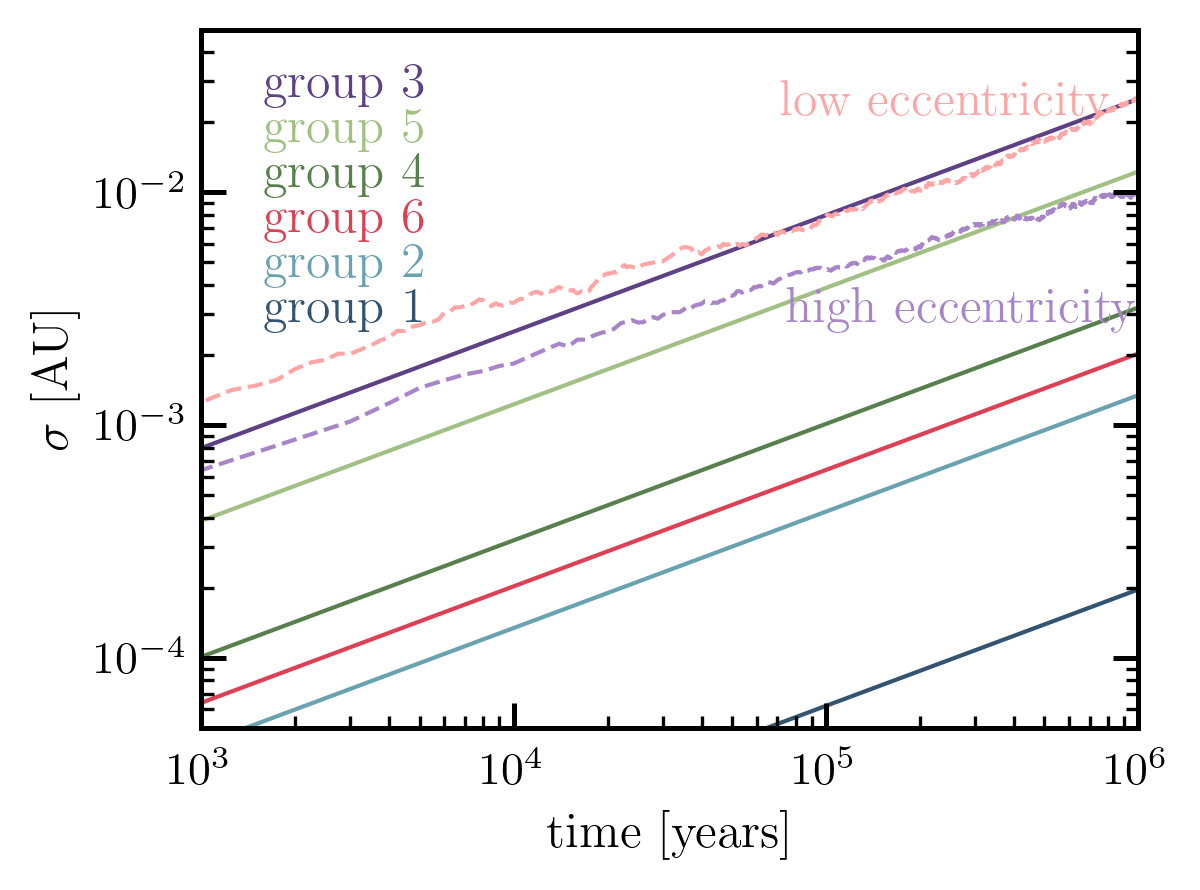

In [24]:
highe_dat = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig13/highe_semi.dat")
highe_time = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig13/highe_time.dat")

lowe_dat = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig13/lowe_semi.dat")
lowe_time = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig13/time.dat")

highe_std = np.std(highe_dat, axis = 1)
lowe_std = np.std(lowe_dat, axis = 1)

def Rhill(ap, Mp, Mstar):
    return ap*(Mp/(3*Mstar))**(1/3)

def eH(RH, ap):
    return (RH/ap)

def Omegap(Mstar, ap):
    return (G*Mstar/ap**3)**(1/2)

def vH(RH, Omegap):
    return RH*Omegap

def delta_apT(i, C, R, m, Mp, Mstar, Mcurly, ap, ad, T, e):
    rh = Rhill(ap, Mp, Mstar)
    eh = eH(rh, ap)
    omegap = Omegap(Mstar, ap)
    vh = vH(rh, omegap)
    if i == 0:
        delap = C*(R**(-4))*((Mcurly*m/Mp)**(0.5))*(ap/ad)*eh*vh*(T/omegap)**(1/2)
    if i == 1: 
        delap = C*(R**(-2))*((Mcurly*m/Mp)**(0.5))*(ap/ad)*e*vh*(T/omegap)**(1/2)
    if i == 2:
        delap = C*((Mcurly*m/Mp)**(0.5))*(ap/ad)*(eh*eh/e)*vh*(T/omegap)**(1/2)
    return delap

mSun = 1.98e33 #grams
mEarth = 3e-6*mSun #grams
mNep = (5.15e-5)*mSun #grams
mPlut = (6.58e-9)*mSun #grams
G = 6.67e-8 # cgs
AU = 1.496e13 #cm
yr_to_sec = 3.1536e7
a_planet = 25*AU
mplanetesimal = 1.8e-10*mSun
mPlanet = 1e-6*mSun
rh = Rhill(a_planet, mPlanet, mSun)
eh = rh/a_planet

curlyC_high = 3.5
curlyC_low = 3.5
# curlyM1 = 4.0625
# curlyM2 = 7.5

# curlyM1 = 269
# curlyM2 = 269

dap11 = delta_apT(1, curlyC_low,  R11, mplanetesimal, mPlanet, mSun, curlyM1, a_planet, a_planet, lowe_time*yr_to_sec, e11)
dap12 = delta_apT(1, curlyC_low,  R12, mplanetesimal, mPlanet, mSun, curlyM2, a_planet, a_planet,lowe_time*yr_to_sec, e12)
dap13 = delta_apT(0, curlyC_low,  R13, mplanetesimal, mPlanet, mSun, curlyM3, a_planet, a_planet,lowe_time*yr_to_sec, e13)
dap21 = delta_apT(2, curlyC_high, R21, mplanetesimal, mPlanet, mSun, curlyM4, a_planet, a_planet,highe_time*yr_to_sec, e21)
dap22 = delta_apT(2, curlyC_high, R22, mplanetesimal, mPlanet, mSun, curlyM5, a_planet, a_planet,highe_time*yr_to_sec, e22)
dap23 = delta_apT(1, curlyC_high, R23, mplanetesimal, mPlanet, mSun, curlyM6, a_planet, a_planet,highe_time*yr_to_sec, e23)

time = np.linspace(1,1e6)*yr_to_sec

f = plt.figure(figsize = (4,3))
ax = plt.axes(xscale='log', yscale='log')
ax.plot(lowe_time, dap11/AU,'-', label = "group 1; e = 0.001; R = 5", zorder = -1, color=colorarr[0])
ax.plot(lowe_time, dap12/AU, '-',  label = "group 2; e = {}; R = 2".format(eh),zorder = -1,color = colorarr[1])
ax.plot(lowe_time, dap13/AU,'-', label = "group 3; e = 0.001; R = 1.2",zorder = -1,color = colorarr[2])
ax.plot(highe_time, dap21/AU, '-', label = "group 4; e = 0.05; R = 1",zorder = -1,color = colorarr[3])
ax.plot(highe_time, dap22/AU, '-', label = "group 5; e = 0.04; R = 3.5",zorder = -1,color = colorarr[4])
ax.plot(highe_time, dap23/AU, '-', label = "group 6; e = 0.05; R = 10.5",zorder = -1,color = colorarr[5])
ax.plot(lowe_time, lowe_std, '--', label = 'low eccentricity',zorder = -1,color = colorarr[6])
ax.plot(highe_time, highe_std,'--', label = 'high eccentricity',zorder = -1,color = colorarr[7])
ax.set_xlabel("time [years]",)
ax.set_ylabel("$\sigma$ [AU]", )
ax.set_ylim(5e-5,5e-2)
ax.set_xlim(1e3,1e6)
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(e11,R11), (0.2,0.89), xycoords = 'figure fraction', color = colorarr[0])
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(np.round(e12,4),R12), (0.2,0.85), xycoords = 'figure fraction', color = colorarr[1])
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(e13,R13), (0.2,0.81), xycoords = 'figure fraction', color = colorarr[2])
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(e21,R21), (0.2,0.77), xycoords = 'figure fraction', color = colorarr[3])
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(e22,R22), (0.2,0.73), xycoords = 'figure fraction', color = colorarr[4])
# ax.annotate("$e = {}$; $\mathcal R$ = {}".format(e23,R23), (0.2,0.69), xycoords = 'figure fraction', color = colorarr[5])

ax.annotate("group 1", (0.22,0.63), xycoords = 'figure fraction', color = colorarr[0])
ax.annotate("group 2", (0.22,0.68), xycoords = 'figure fraction', color = colorarr[1])
ax.annotate("group 3", (0.22,0.88), xycoords = 'figure fraction', color = colorarr[2])
ax.annotate("group 4", (0.22,0.78), xycoords = 'figure fraction', color = colorarr[3])
ax.annotate("group 5", (0.22,0.83), xycoords = 'figure fraction', color = colorarr[4])
ax.annotate("group 6", (0.22,0.73), xycoords = 'figure fraction', color = colorarr[5])

ax.annotate("low eccentricity", (0.65, 0.86),xycoords = 'figure fraction', color = colorarr[6])
ax.annotate("high eccentricity", (0.655,0.63), xycoords = 'figure fraction', color = colorarr[7])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#this set the ticks to be on the left and bottom of the plot only
# plt.tick_params(which='major',bottom='on',top='off',left='on',right='off',direction='in',length=8)
# plt.tick_params(which='minor',bottom='on',top='off',left='on',right='off',direction='in',length=3)
plt.tick_params(axis = 'y', which = 'minor', width = 0.8, length = 3)
# plt.tick_params(axis='y', which = 'both', right = False)
plt.tick_params(axis='x', which = 'both', top = False)
plt.tick_params(axis='x', which = 'minor', width = 0.8, length = 3)
plt.tight_layout(pad=0.35, w_pad=0.5)

24.958479801409002 0.02526757953941954
24.984671226411926 0.010252944660437012


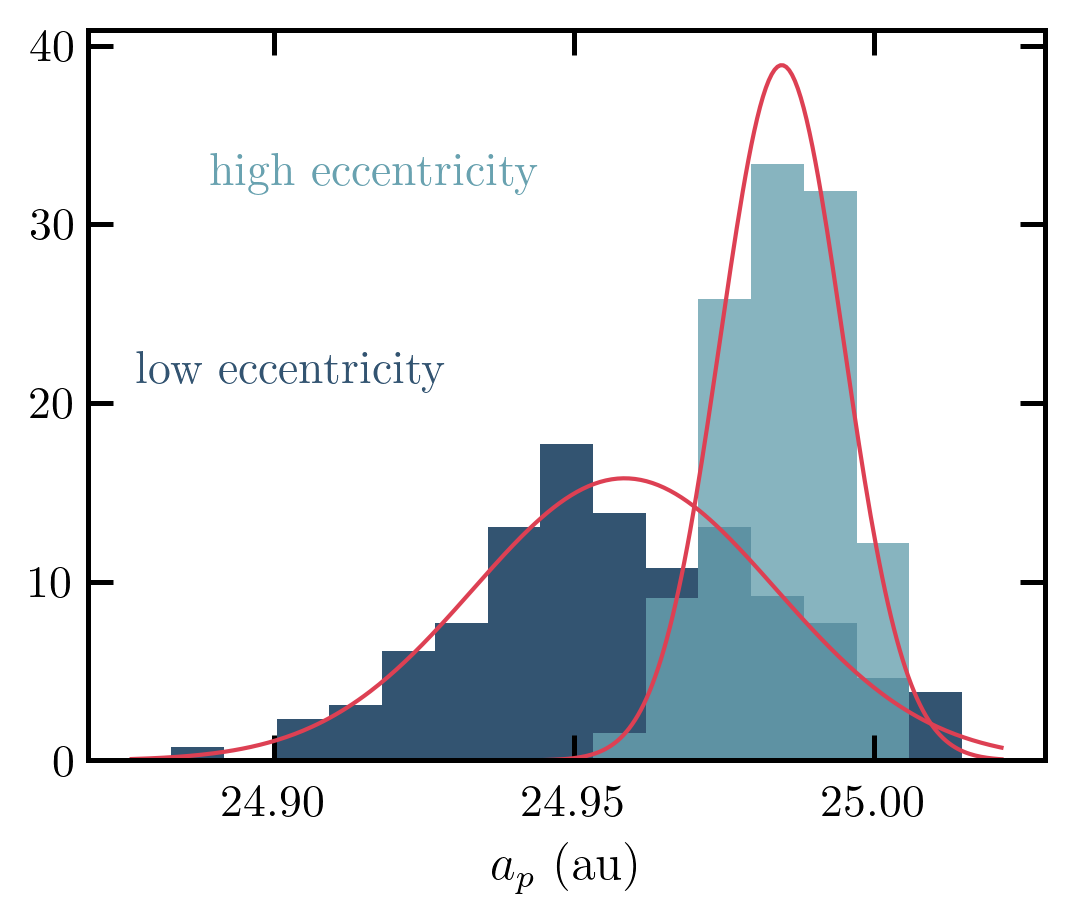

In [25]:
highe_hist = highe_dat[-1]
lowe_hist = lowe_dat[-1]


plt.figure(figsize = (3.5,3))
nlow, blow, elow = plt.hist(lowe_hist, bins = 15, density= True,align="mid")

nhigh, bhigh, ehigh = plt.hist(highe_hist, bins = blow, alpha = 0.8, density = True,align="mid")
xmin, xmax = plt.xlim()
xlow = np.linspace(xmin, xmax, 300)
xhigh = np.linspace(xmin, xmax, 300)

# mu_low, sigma_low = norm.fit(blow)
mu_low = np.mean(lowe_hist)
sigma_low = np.std(lowe_hist)
p_low = norm.pdf(xlow, mu_low, sigma_low)

plt.plot(xlow, p_low, color = colors["Amaranth"])
print(mu_low, sigma_low)

# mu_high, sigma_high =norm.fit(bhigh)
mu_high = np.mean(highe_hist)
sigma_high = np.std(highe_hist)
p_high = norm.pdf(xhigh, mu_high, sigma_high)

plt.plot(xhigh, p_high, color = colors["Amaranth"])
print(mu_high, sigma_high)


plt.xlabel('$a_p$ (au)')
plt.annotate("high eccentricity", (0.2, 0.82), xycoords = 'figure fraction', color = colors['Cadet Blue'], fontsize = 11)
plt.annotate("low eccentricity", (0.13, 0.6), xycoords = 'figure fraction', color = colors["Bdazzled Blue"], fontsize = 11)
plt.tight_layout(pad = 0.35, w_pad = 0.5)